# Assignment 1

## Question `2` (Decision Trees)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

This assignment will have you working and experimenting with decision trees. Initially, you will be required to implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, you can experiment with the `scikit-learn` implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
%matplotlib inline
# additional imports if necessary

In [2]:
data=pd.read_csv("bankAuth.txt")
print(data.shape)

(1371, 5)


In [3]:
data.columns = ["variance", "skewness", "curtosis", "entropy","label"]

X=data.iloc[:,0:]
y=data.iloc[:,-1:]

print(X.head(3))
print(y.head(3))

X=np.array(X)
y=np.array(y).ravel()

   variance  skewness  curtosis  entropy  label
0    4.5459    8.1674   -2.4586 -1.46210      0
1    3.8660   -2.6383    1.9242  0.10645      0
2    3.4566    9.5228   -4.0112 -3.59440      0
   label
0      0
1      0
2      0


In [4]:

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 1)

In [5]:

def countClass(rows):
    countsDict = {}
    for r in rows:
        lbl = r[len(r)-1]
        if lbl not in countsDict:
            countsDict[lbl] = 0
        countsDict[lbl] = countsDict[lbl]+ 1
    return countsDict


header = ['variance', 'skewness', 'curtosis', 'entropy', 'label']


In [6]:
class Question:
    def __init__(self, col, val):
        self.column = col
        self.value = val

    def Ismatch(self, exp):
        val = exp[self.column]
        ans1=isinstance(val, int)
        ans2=isinstance(val, float)

        if ans1 or ans2:
            return self.value<=val
        else:
            return self.value==val 
    def __repr__(self):
        condition = "=="
        ans1=isinstance(self.value, int)
        ans2=isinstance(self.value, float)
        
        if ans1 or ans2:
            condition = ">="
        ret= "Is %s %s %s" % (header[self.column], condition, str(self.value))
        return ret
            

In [7]:

def divide(rows, question):
    trows = []
    frows = []
    for row in rows:
        if question.Ismatch(row):
            trows.append(row)
        if not question.Ismatch(row):
            frows.append(row)
    return trows, frows

def gini_index(trows, frows, classes):
    groups = (trows, frows)
    new_groups=[len(group) for group in groups]
    nInstances = float(sum(new_groups))
    gini = 0.0
    for g in groups:
        s = float(len(g))
        if s == 0:
            continue
        elif s!=0:
            score = 0.0
            i=0
            while i< len(classes):
                p = [row[-1] for row in g].count(classes[i])
                p= p / s
                score =score+ p * p
                i=i+1
            gini =gini+ (1.0 - score) * (s / nInstances)
    return gini
def find_best_split(rows):
    bgain,i = 999,0
    bquestion = None
    cvalues=set()
    while i <len(rows):
        cvalues.add(rows[i][-1])
        i=i+1
        
    cvalues=list(cvalues)
    l=len(rows[0])
    n_features = l - 1
    for col in range(0,n_features):

        values=set()
        for i in range(len(rows)):
            values.add(rows[i][col])
            
        for val in values:
            question = Question(col, val)
            trows, frows = divide(rows, question)
            gain = gini_index(trows, frows, cvalues)
            if bgain>gain:
                bgain = gain
                bquestion = question
    return bgain, bquestion



In [8]:
class Leaf:
    def __init__(self, r):
        self.predictions = countClass(r)

In [9]:
class Decision_Node:
    def __init__(self, ques, tbranch, fbranch):
        self.question = ques
        self.true_branch = tbranch
        self.false_branch = fbranch

In [10]:
maxDepth=3

In [11]:
def build_tree(rows,depth,maxDepth):
    gain, question = find_best_split(rows)
    if gain == 0:
        return Leaf(rows)
    elif depth>=maxDepth:
        return Leaf(rows)
    else:
        trows, frows = divide(rows, question)
        tbranch = build_tree(trows,depth+1,maxDepth)
        fbranch = build_tree(frows,depth+1,maxDepth)
        return Decision_Node(question, tbranch, fbranch)
def print_tree(node, spacing=""):
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return
    else:
        print(spacing + str(node.question)+"\n"+ spacing + '--> True:')
        print_tree(node.true_branch, spacing + "  ")
        print(spacing + '--> False:')
        print_tree(node.false_branch, spacing + "  ")

In [12]:
Ctree = build_tree(X_train,0,maxDepth)
print_tree(Ctree)#preorder traversal

Is variance >= 0.3223
--> True:
  Is curtosis >= -4.3839
  --> True:
    Is variance >= 1.594
    --> True:
      Predict {0.0: 390, 1.0: 3}
    --> False:
      Predict {0.0: 113, 1.0: 31}
  --> False:
    Predict {1.0: 29, 0.0: 6}
--> False:
  Is skewness >= 5.8974
  --> True:
    Is variance >= -2.7143
    --> True:
      Predict {0.0: 75}
    --> False:
      Predict {1.0: 31, 0.0: 1}
  --> False:
    Is curtosis >= 6.2204
    --> True:
      Predict {1.0: 101, 0.0: 19}
    --> False:
      Predict {1.0: 296, 0.0: 1}


In [13]:
def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions
    elif node.question.Ismatch(row):
        return classify(row, node.true_branch)
    elif not node.question.Ismatch(row):
        return classify(row, node.false_branch)

def print_leaf(cts):
    s = sum(cts.values())
    total = s * 1.0
    pro = {}
    for lbl in cts.keys():
        pro[lbl] = str(int(cts[lbl] / total * 100))
        pro[lbl]=pro[lbl]+ '%'
    return pro

In [14]:
def get_acc(X):
    correct = 0
    for row in X:
        s=print_leaf(classify(row, Ctree))
        actual = int(row[-1])
        m = -1e9
        label = 0
        for key in s.keys():
            val = s[key]
            val = int(val[:-1])
            if val > m:
                m = val
                label = int(key)
        if (label == 0 and actual == 0):
            correct= correct+1
        if (label == 1 and actual == 1):
            correct =correct+ 1
    return correct / X.shape[0]

In [15]:
print("accuracy is ",get_acc(X_test))

accuracy is  0.9163636363636364


### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy
3. Misclassification Error
4. Log Loss

Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

In [16]:
# your code here

### `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

- We need to use DecisionTreeClassifier in banknote authentication dataset dataset because y values are 0 or 1 means it is classification problem
- We will use the decision tree regressor when we are asked to find the authenticity percentage of a bankNote .

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [17]:
data = pd.read_csv('bankAuth.txt')

In [18]:
# your code here
data.columns = ["variance", "skewness", "curtosis", "entropy","label"]

X=data.iloc[:,0:-1]
y=data.iloc[:,-1:]

print(X.head(3))
print(y.head(3))

X=np.array(X)
y=np.array(y).ravel()

print(X.shape)
print(y.shape)

   variance  skewness  curtosis  entropy
0    4.5459    8.1674   -2.4586 -1.46210
1    3.8660   -2.6383    1.9242  0.10645
2    3.4566    9.5228   -4.0112 -3.59440
   label
0      0
1      0
2      0
(1371, 4)
(1371,)


In [19]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 1)

In [20]:
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split =8)#criterion = "entropy"
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=8)

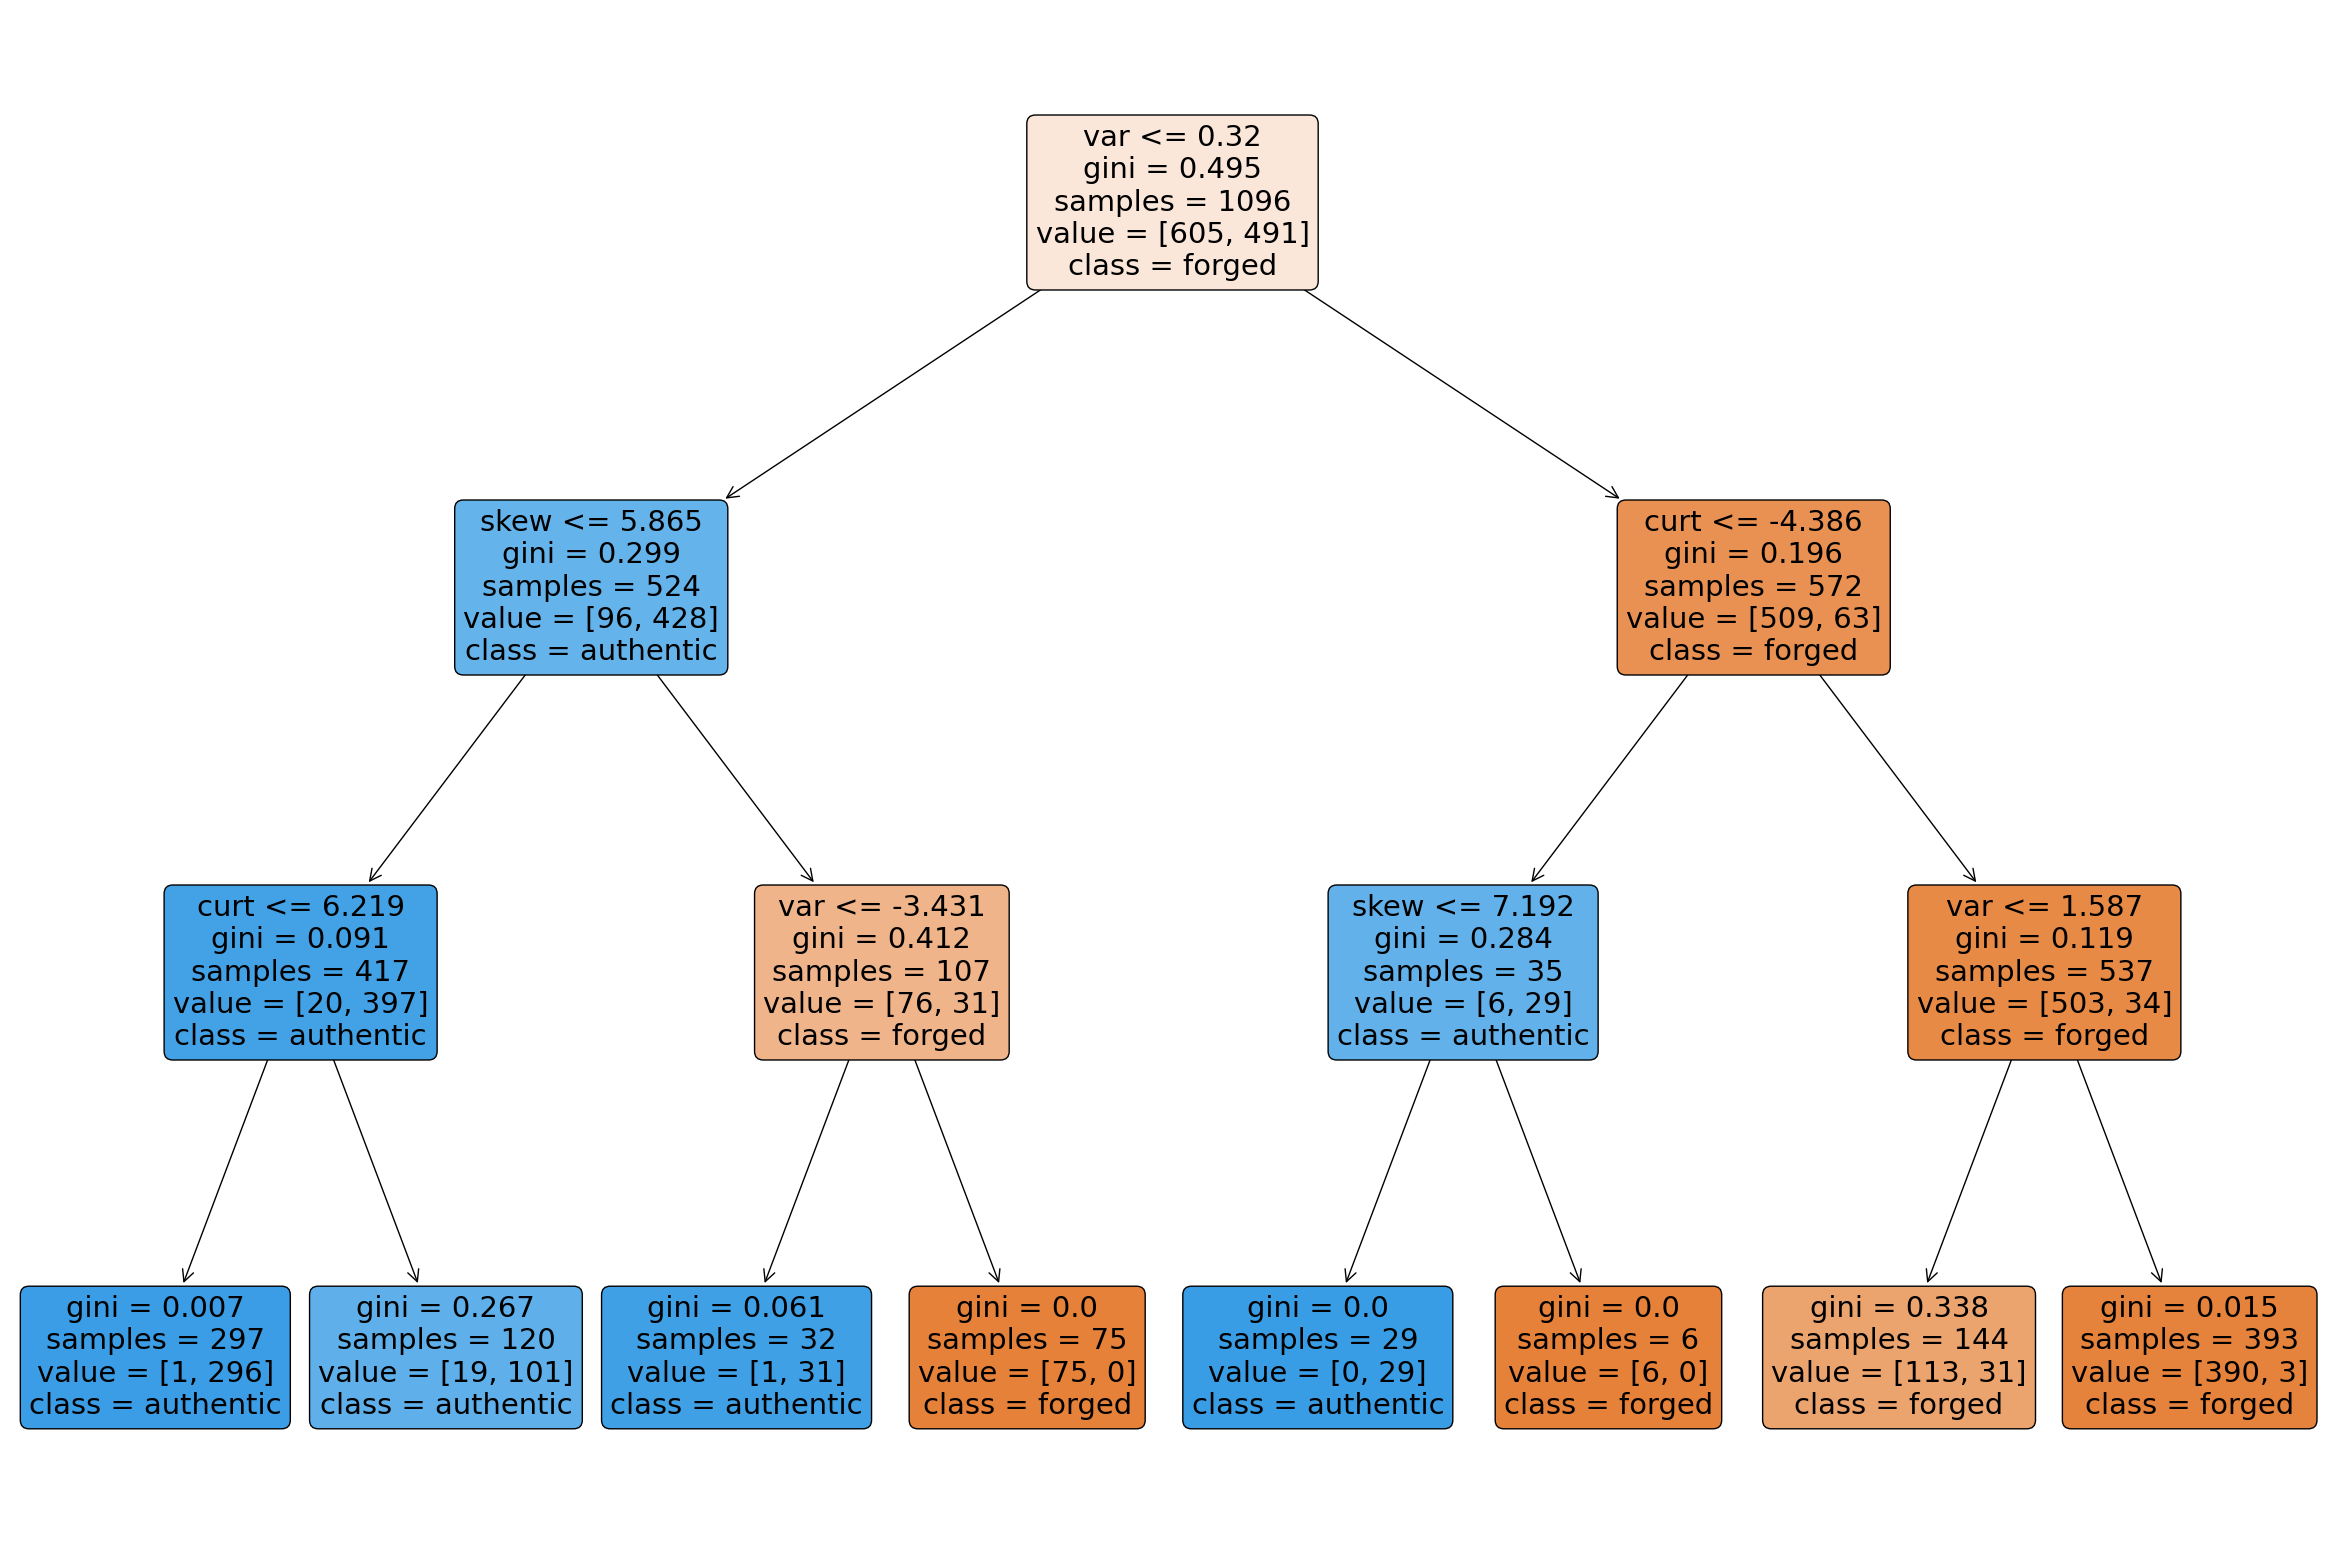

In [21]:
plt.figure(figsize=(30,20))
plot_tree(classifier, filled=True, rounded=True,class_names=['forged', 'authentic'],feature_names=['var', 'skew', 'curt', 'ent'])
plt.show()  
              


In [22]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9498175182481752
0.9345454545454546


- criterion=gini, max_depth=3, min_samples_split=8 ,test accuracy=0.9345454545454546,train accuracy=0.9498175182481752
- criterion=gini, max_depth=4, min_samples_split=8 ,test accuracy=0.9745454545454545,train accuracy=0.9799270072992701
- criterion=gini, max_depth=3, min_samples_split=10 ,test accuracy=0.9345454545454546,train accuracy=0.9498175182481752
- criterion=gini, max_depth=4, min_samples_split=10 ,test,accuracy=0.9745454545454545,train accuracy=0.9799270072992701


- criterion=entropy, max_depth=3, min_samples_split=8 ,test accuracy=0.92,train accuracy=0.9443430656934306
- criterion=entropy, max_depth=4, min_samples_split=8 ,test accuracy=0.9672727272727273,train accuracy=0.9662408759124088
- criterion=entropy, max_depth=3, min_samples_split=10 ,test accuracy=0.92,train accuracy=0.9443430656934306
- criterion=entropy, max_depth=4, min_samples_split=10 ,test accuracy=0.9672727272727273,train accuracy=0.9662408759124088


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [23]:
# your code here

### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

In [24]:
# your code here